Problem Understanding

1. Latar Belakang 
Detik News adalah salah satu portal berita besar di Indonesia. Artikel berita memiliki berbagai kategori seperti  'oto', 'travel', 'food', 'inet', 'finance''hot''sport' Dalam era informasi yang cepat, mengklasifikasikan berita secara otomatis menjadi penting untuk efisiensi pengelompokan dan analisis data berita.

2. Tujuan
Membangun model machine learning (dengan algoritma Regresi Logistik) untuk mengklasifikasikan berita berdasarkan isi berita tersebut. Targetnya adalah prediksi kategori berita berdasarkan fitur yang tersedia (seperti judul, isi berita, dan fitur lainnya).

3. Permasalahan
Bagaimana membangun model klasifikasi sederhana namun akurat yang mampu mengelompokkan artikel berita ke dalam kategori yang tepat berdasarkan teks?

Masalah ini termasuk dalam kategori Klasifikasi Multikelas, di mana setiap artikel berita harus diklasifikasikan ke dalam salah satu dari beberapa kategori yang tersedia.
Algoritma yang digunakan -> Multinomial Regresi Logistik (Logistic Regression)
Matrik Evaluasi yang digunakan -> : Akurasi, Precision, Recall, F1-Score



Import Library

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.special import softmax
from scipy.sparse import csr_matrix
import pickle
from collections import defaultdict



✅ 1. Load Dataset
Memuat data dari sumber eksternal (misalnya, file CSV) ke dalam struktur data yang dapat digunakan, seperti DataFrame.

In [2]:


# Load dataset
data = pd.read_csv('detik_news.csv')

# Tampilkan 5 data pertama
print(data.head())


                                               title category
0  Matcha dan Green Tea Tidak Sama, Kenali 5 Perb...     food
1  Ada Udang Pecak hingga Cumi Karang Asam di Pes...     food
2  Disebut Mirip MPASI, Porsi Makanan Pasien di R...     food
3  Seleb Korea Ini Tak Doyan Mie Instan, Hanya Ma...     food
4  Duh! Wanita Ini Beli Sandwich Tapi Kena Tagih ...     food


In [3]:


# Load data
df = pd.read_csv('detik_news.csv')

# Ambil kolom 'title' dan tampilkan sebagian
df_step1 = df[['title']].copy()
df_step1.columns = ['original']
print(df_step1.head(10))


                                            original
0  Matcha dan Green Tea Tidak Sama, Kenali 5 Perb...
1  Ada Udang Pecak hingga Cumi Karang Asam di Pes...
2  Disebut Mirip MPASI, Porsi Makanan Pasien di R...
3  Seleb Korea Ini Tak Doyan Mie Instan, Hanya Ma...
4  Duh! Wanita Ini Beli Sandwich Tapi Kena Tagih ...
5  Viral Sopir Ojol Dibawakan Bekal Gemas oleh Is...
6  Sisca Soewitomo Kritik Masakan Sisca Kohl Tern...
7  Curi Perhatian! Nasi Goreng Seberat 1 Kg hingg...
8  Sejak 1959 Warung Nasi Haji Mamad Sajikan Sop ...
9  Hadir Kembali! 'Bikin Laper' Festival, Ada 40 ...


Data Understanding

1. Jumlah baris (data): 69.700
2. Jumlah kolom: 2 kolom -> title (judul berita teks) dan kategory berita (label target)
3. Tidak ada nilai yang kosong (null).
4. Tipe data semua kolom object tekss


Distribusi kategori jumlah data
Kategori
Jumlah Data
oto -> 9.980
travel -> 9.980
food -> 9.960
inet -> 9.960
finance -> 9.940
hot-> 9.940
sport -> 9.940

Data cukup seimbang antar kategori (hampir sama banyak).





✅ 2. Exploratory Data Analysis (EDA)
Melakukan analisis awal untuk memahami struktur, distribusi, dan pola dalam data.​

- Menampilkan beberapa baris pertama data.
- Memeriksa tipe data dan nilai yang hilang.
- Menganalisis distribusi kategori target.
- Menghitung panjang teks (judul atau isi berita).

In [4]:
# Cek struktur data
print("\nInfo Dataset:")
print(data.info())

# Cek ukuran data
print("\nJumlah baris dan kolom:")
print(data.shape)



Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69700 entries, 0 to 69699
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     69700 non-null  object
 1   category  69700 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None

Jumlah baris dan kolom:
(69700, 2)


Cwk Missing Value

In [5]:
# Cek apakah ada missing value
print("\nJumlah Missing Value per Kolom:")
print(data.isnull().sum())

# Cek secara keseluruhan apakah ada missing
if data.isnull().values.any():
    print("Ada data yang kosong.")
else:
    print("Tidak ada data yang kosong.")



Jumlah Missing Value per Kolom:
title       0
category    0
dtype: int64
Tidak ada data yang kosong.


Distribusi kategori

In [6]:
# Distribusi jumlah data per kategori
print("\nDistribusi Data per Kategori:")
print(data['category'].value_counts())

# Persentase distribusi kategori
print("\nPersentase per Kategori:")
print((data['category'].value_counts(normalize=True) * 100).round(2))



Distribusi Data per Kategori:
category
oto        9980
travel     9980
food       9960
inet       9960
finance    9940
hot        9940
sport      9940
Name: count, dtype: int64

Persentase per Kategori:
category
oto        14.32
travel     14.32
food       14.29
inet       14.29
finance    14.26
hot        14.26
sport      14.26
Name: proportion, dtype: float64



===== Distribusi Kategori =====
category
oto        9980
travel     9980
food       9960
inet       9960
finance    9940
hot        9940
sport      9940
Name: count, dtype: int64


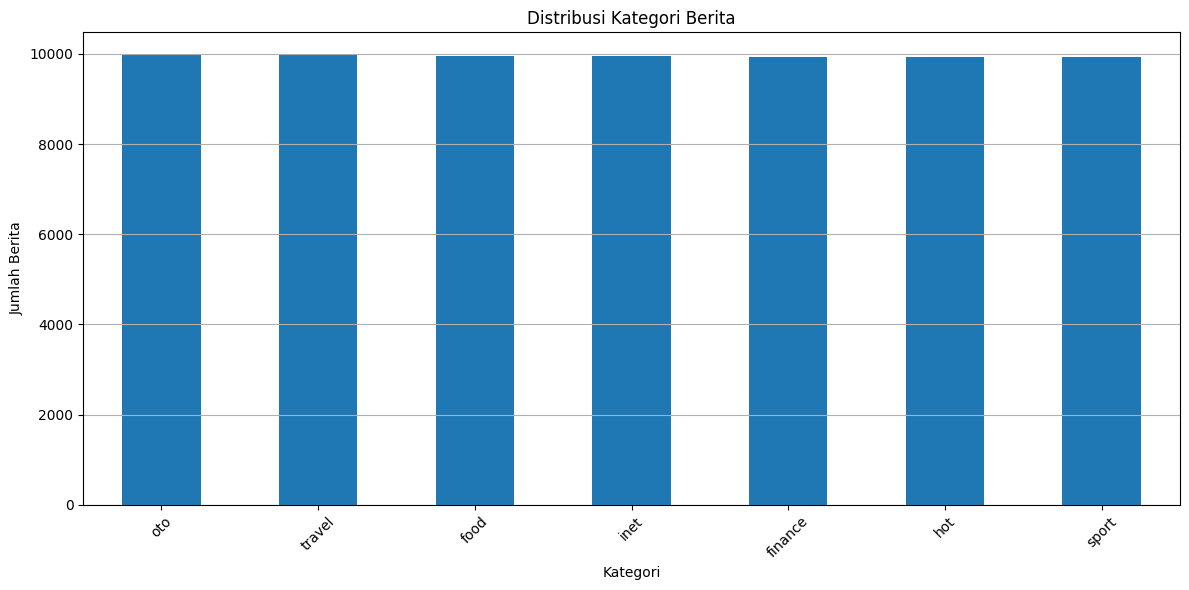

In [7]:

# Cek jumlah data per kategori 
print("\n===== Distribusi Kategori =====")
print(data['category'].value_counts())

# Visualisasi distribusi kategori
plt.figure(figsize=(12,6))
data['category'].value_counts().plot(kind='bar')
plt.title('Distribusi Kategori Berita')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Berita')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Panjang Judul (Jumlah Karakter dan Kata)

In [8]:
# Menambah kolom baru: panjang judul
data['char_length'] = data['title'].apply(len)
data['word_length'] = data['title'].apply(lambda x: len(x.split()))
# Statistik panjang karakter
print("\nStatistik Panjang Judul (Karakter):")
print(data['char_length'].describe())

# Statistik panjang kata
print("\nStatistik Panjang Judul (Kata):")
print(data['word_length'].describe())



Statistik Panjang Judul (Karakter):
count    69700.000000
mean        71.408580
std         15.927819
min         12.000000
25%         61.000000
50%         71.000000
75%         82.000000
max        134.000000
Name: char_length, dtype: float64

Statistik Panjang Judul (Kata):
count    69700.000000
mean         9.590316
std          1.863714
min          2.000000
25%          8.000000
50%         10.000000
75%         11.000000
max         17.000000
Name: word_length, dtype: float64


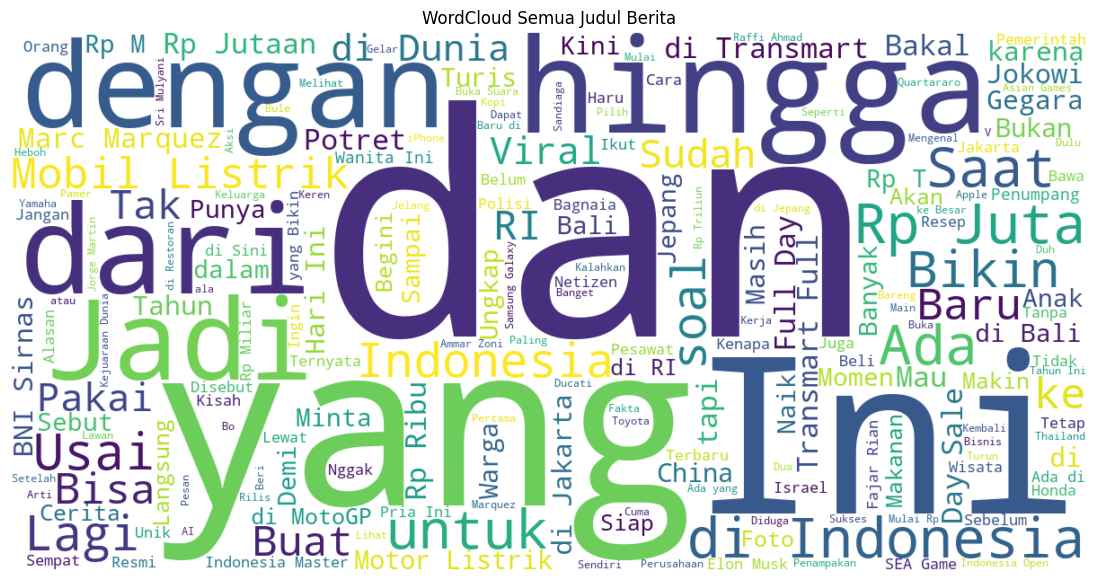

In [9]:
# 5. WordCloud untuk semua judul


all_titles = ' '.join(data['title'].astype(str))

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(all_titles)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Semua Judul Berita')
plt.show()


Kata" yang paling sering muncul

In [10]:


# Preprocessing ringan: lowercase + hapus tanda baca
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Misalkan data adalah DataFrame yang sudah ada sebelumnya
data['clean_title'] = data['title'].apply(clean_text)

# Membuat list semua kata
all_words = ' '.join(data['clean_title']).split()

# Hitung frekuensi kata
word_counter = Counter(all_words)

# Ambil 20 kata paling sering
most_common_words = word_counter.most_common(20)

# Mengonversi hasil menjadi DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['Kata', 'Frekuensi'])

# Tampilkan DataFrame
print("\n20 Kata Paling Sering Muncul:")
print(df_most_common)



20 Kata Paling Sering Muncul:
         Kata  Frekuensi
0          di      21404
1         ini       9627
2        yang       7317
3         dan       6858
4          ke       4440
5   indonesia       4233
6          rp       4094
7        jadi       3520
8        dari       3208
9         ada       2759
10        tak       2600
11      untuk       2595
12       bisa       2581
13      mobil       2523
14      bikin       2382
15     dengan       2292
16     hingga       2079
17      tahun       2030
18     motogp       2025
19       baru       1934


visualisasi kata yg sering muncul

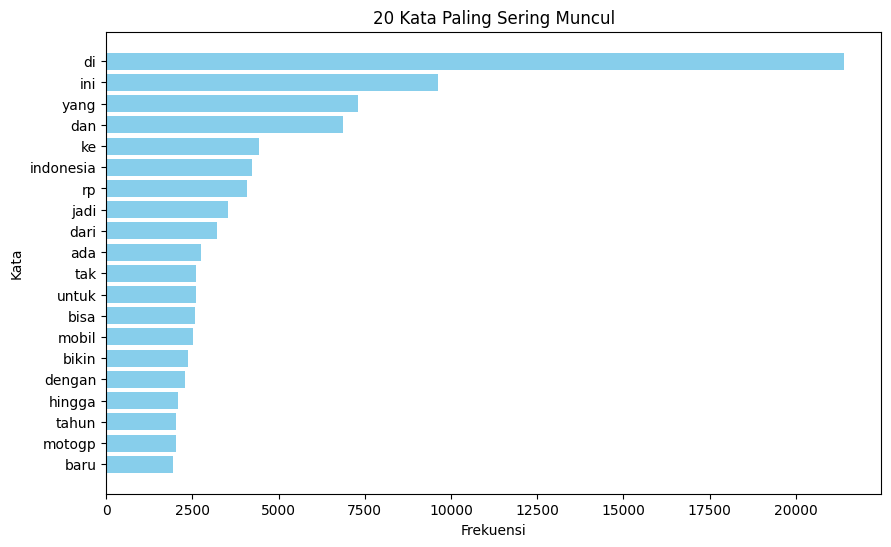

In [11]:
# Visualisasi menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_most_common['Kata'], df_most_common['Frekuensi'], color='skyblue')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('20 Kata Paling Sering Muncul')
plt.gca().invert_yaxis()  # Membalikkan urutan y-axis sehingga kata paling sering muncul di atas
plt.show()

Visualisasi Panjang Judul

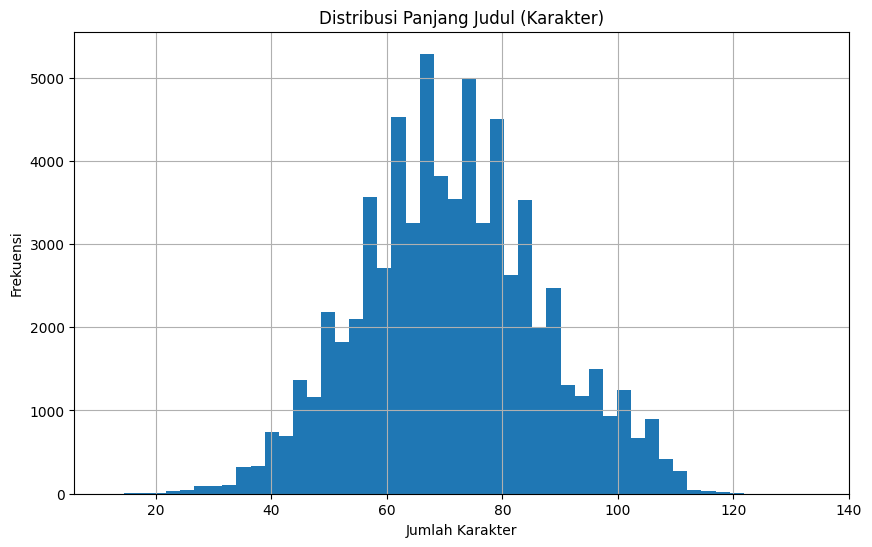

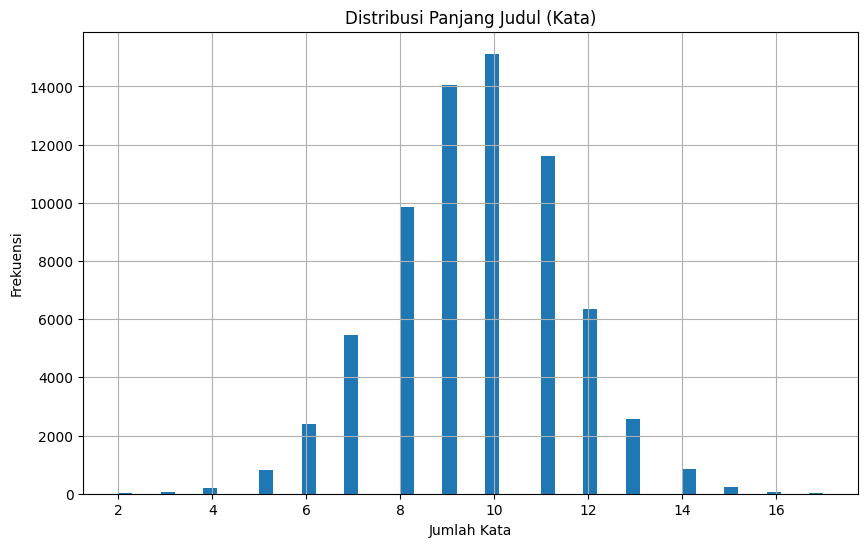

In [12]:


# Histogram panjang karakter
plt.figure(figsize=(10,6))
plt.hist(data['char_length'], bins=50)
plt.title('Distribusi Panjang Judul (Karakter)')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Histogram panjang kata
plt.figure(figsize=(10,6))
plt.hist(data['word_length'], bins=50)
plt.title('Distribusi Panjang Judul (Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


✅3. Data Prepocessing

1. Stemming -> Mengubah kata ke bentuk dasar
2. Lowercasing -> Mengubah semua teks menjadi huruf kecil.
3. Cleaning -> Menghapus karakter spesial (seperti tanda baca, angka, simbol).
4. Tokenization ->  Memecah kalimat menjadi kata-kata.
5. Stopword Removal ->  Menghapus kata-kata umum yang tidak membawa banyak informasi ("yang", "di", "ke", "dengan", dll).
6.  Vectorization ->  Mengubah teks menjadi representasi numerik menggunakan: TFIDF



1. Stemming -> mengubah kata ke bentuk dasar

In [13]:
#Buat kamus steeming
kamus_isi = '''
berlari => lari
melarikan => lari
pelari => lari
berjualan => jual
penjualan => jual
menjual => jual
makanan => makan
memakan => makan
dimakan => makan
minuman => minum
meminum => minum
diminum => minum
membaca => baca
bacaan => baca
penulis => tulis
menulis => tulis
tulisan => tulis
melihat => lihat
penglihatan => lihat
dilihat => lihat
bermain => main
permainan => main
dimainkan => main
'''.strip()

with open("kamusStemming.txt", "w", encoding="utf-8") as f:
    f.write(kamus_isi)

print("✅ Kamus berhasil dibuat!")

# 2. Baca kamus dari file
kamus_stem = {}
with open("kamusStemming.txt", "r", encoding="utf-8") as f:
    for line in f:
        if "=>" in line:
            kata, dasar = line.strip().split(" => ")
            kamus_stem[kata] = dasar

# 3. Fungsi stemming manual menggunakan kamus
def stemming_kamus_manual(teks):
    hasil = []
    for kata in teks.split():
        kata_stem = kamus_stem.get(kata, kata)
        hasil.append(kata_stem)
    return ' '.join(hasil)

# 4. Contoh penggunaan
contoh = "pelari bermain permainan dimakan membaca"
print("Asli  :", contoh)
print("Stemmed:", stemming_kamus_manual(contoh))


✅ Kamus berhasil dibuat!
Asli  : pelari bermain permainan dimakan membaca
Stemmed: lari main main makan baca


In [14]:
def stemming_kamus_manual(teks):
    hasil = []
    for kata in teks.split():
        kata_stem = kamus_stem.get(kata, kata)  # ambil dari kamus, jika tidak ada gunakan aslinya
        hasil.append(kata_stem)
    return ' '.join(hasil)

# Contoh penggunaan
df_step1['stemmed'] = df_step1['original'].apply(stemming_kamus_manual)
print(df_step1[['original', 'stemmed']].head(10))


                                            original  \
0  Matcha dan Green Tea Tidak Sama, Kenali 5 Perb...   
1  Ada Udang Pecak hingga Cumi Karang Asam di Pes...   
2  Disebut Mirip MPASI, Porsi Makanan Pasien di R...   
3  Seleb Korea Ini Tak Doyan Mie Instan, Hanya Ma...   
4  Duh! Wanita Ini Beli Sandwich Tapi Kena Tagih ...   
5  Viral Sopir Ojol Dibawakan Bekal Gemas oleh Is...   
6  Sisca Soewitomo Kritik Masakan Sisca Kohl Tern...   
7  Curi Perhatian! Nasi Goreng Seberat 1 Kg hingg...   
8  Sejak 1959 Warung Nasi Haji Mamad Sajikan Sop ...   
9  Hadir Kembali! 'Bikin Laper' Festival, Ada 40 ...   

                                             stemmed  
0  Matcha dan Green Tea Tidak Sama, Kenali 5 Perb...  
1  Ada Udang Pecak hingga Cumi Karang Asam di Pes...  
2  Disebut Mirip MPASI, Porsi Makanan Pasien di R...  
3  Seleb Korea Ini Tak Doyan Mie Instan, Hanya Ma...  
4  Duh! Wanita Ini Beli Sandwich Tapi Kena Tagih ...  
5  Viral Sopir Ojol Dibawakan Bekal Gemas oleh Is... 

Lowercase -> Mengubah semua teks menjadi huruf kecil.

In [15]:
df_step2 = df_step1.copy()
df_step2['lowercase'] = df_step2['original'].str.lower()

# Tampilkan hasil sebelum dan sesudah lowercase
print(df_step2[['original', 'lowercase']].head(10))


                                            original  \
0  Matcha dan Green Tea Tidak Sama, Kenali 5 Perb...   
1  Ada Udang Pecak hingga Cumi Karang Asam di Pes...   
2  Disebut Mirip MPASI, Porsi Makanan Pasien di R...   
3  Seleb Korea Ini Tak Doyan Mie Instan, Hanya Ma...   
4  Duh! Wanita Ini Beli Sandwich Tapi Kena Tagih ...   
5  Viral Sopir Ojol Dibawakan Bekal Gemas oleh Is...   
6  Sisca Soewitomo Kritik Masakan Sisca Kohl Tern...   
7  Curi Perhatian! Nasi Goreng Seberat 1 Kg hingg...   
8  Sejak 1959 Warung Nasi Haji Mamad Sajikan Sop ...   
9  Hadir Kembali! 'Bikin Laper' Festival, Ada 40 ...   

                                           lowercase  
0  matcha dan green tea tidak sama, kenali 5 perb...  
1  ada udang pecak hingga cumi karang asam di pes...  
2  disebut mirip mpasi, porsi makanan pasien di r...  
3  seleb korea ini tak doyan mie instan, hanya ma...  
4  duh! wanita ini beli sandwich tapi kena tagih ...  
5  viral sopir ojol dibawakan bekal gemas oleh is... 

 Cleaning (hapus tanda baca & angka)-> Menghapus karakter spesial (seperti tanda baca, angka, simbol).

In [16]:
df_step3 = df_step2.copy()
df_step3['cleaned'] = df_step3['lowercase'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tampilkan hasil sebelum dan sesudah cleaning
print(df_step3[['lowercase', 'cleaned']].head(10))


                                           lowercase  \
0  matcha dan green tea tidak sama, kenali 5 perb...   
1  ada udang pecak hingga cumi karang asam di pes...   
2  disebut mirip mpasi, porsi makanan pasien di r...   
3  seleb korea ini tak doyan mie instan, hanya ma...   
4  duh! wanita ini beli sandwich tapi kena tagih ...   
5  viral sopir ojol dibawakan bekal gemas oleh is...   
6  sisca soewitomo kritik masakan sisca kohl tern...   
7  curi perhatian! nasi goreng seberat 1 kg hingg...   
8  sejak 1959 warung nasi haji mamad sajikan sop ...   
9  hadir kembali! 'bikin laper' festival, ada 40 ...   

                                             cleaned  
0  matcha dan green tea tidak sama kenali  perbed...  
1  ada udang pecak hingga cumi karang asam di pes...  
2  disebut mirip mpasi porsi makanan pasien di ru...  
3  seleb korea ini tak doyan mie instan hanya mak...  
4  duh wanita ini beli sandwich tapi kena tagih s...  
5  viral sopir ojol dibawakan bekal gemas oleh is... 

Tokenisasi  -> Memecah kalimat menjadi kata-kata.

In [17]:
df_step4 = df_step3.copy()
df_step4['tokens'] = df_step4['cleaned'].apply(lambda x: x.split())

# Tampilkan hasil sebelum dan sesudah tokenisasi
print(df_step4[['cleaned', 'tokens']].head(10))


                                             cleaned  \
0  matcha dan green tea tidak sama kenali  perbed...   
1  ada udang pecak hingga cumi karang asam di pes...   
2  disebut mirip mpasi porsi makanan pasien di ru...   
3  seleb korea ini tak doyan mie instan hanya mak...   
4  duh wanita ini beli sandwich tapi kena tagih s...   
5  viral sopir ojol dibawakan bekal gemas oleh is...   
6  sisca soewitomo kritik masakan sisca kohl tern...   
7  curi perhatian nasi goreng seberat  kg hingga ...   
8  sejak  warung nasi haji mamad sajikan sop kaki...   
9  hadir kembali bikin laper festival ada  tenant...   

                                              tokens  
0  [matcha, dan, green, tea, tidak, sama, kenali,...  
1  [ada, udang, pecak, hingga, cumi, karang, asam...  
2  [disebut, mirip, mpasi, porsi, makanan, pasien...  
3  [seleb, korea, ini, tak, doyan, mie, instan, h...  
4  [duh, wanita, ini, beli, sandwich, tapi, kena,...  
5  [viral, sopir, ojol, dibawakan, bekal, gemas, ... 

Stopword Removal ->  Menghapus kata-kata umum yang tidak membawa banyak informasi ("yang", "di", "ke", "dengan", dll).

In [18]:
stopwords = {
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'pada', 'ini',
    'itu', 'atau', 'dalam', 'karena', 'juga', 'bisa', 'ada', 'saat', 'lagi',
    'adalah', 'oleh', 'sebagai', 'mereka', 'akan', 'tidak', 'telah', 'kami'
}

df_step5 = df_step4.copy()
df_step5['tokens_nostopwords'] = df_step5['tokens'].apply(lambda tokens: [t for t in tokens if t not in stopwords])

# Tampilkan hasil sebelum dan sesudah hapus stopwords
print(df_step5[['tokens', 'tokens_nostopwords']].head(10))


                                              tokens  \
0  [matcha, dan, green, tea, tidak, sama, kenali,...   
1  [ada, udang, pecak, hingga, cumi, karang, asam...   
2  [disebut, mirip, mpasi, porsi, makanan, pasien...   
3  [seleb, korea, ini, tak, doyan, mie, instan, h...   
4  [duh, wanita, ini, beli, sandwich, tapi, kena,...   
5  [viral, sopir, ojol, dibawakan, bekal, gemas, ...   
6  [sisca, soewitomo, kritik, masakan, sisca, koh...   
7  [curi, perhatian, nasi, goreng, seberat, kg, h...   
8  [sejak, warung, nasi, haji, mamad, sajikan, so...   
9  [hadir, kembali, bikin, laper, festival, ada, ...   

                                  tokens_nostopwords  
0   [matcha, green, tea, sama, kenali, perbedaannya]  
1  [udang, pecak, hingga, cumi, karang, asam, pes...  
2  [disebut, mirip, mpasi, porsi, makanan, pasien...  
3  [seleb, korea, tak, doyan, mie, instan, hanya,...  
4  [duh, wanita, beli, sandwich, tapi, kena, tagi...  
5  [viral, sopir, ojol, dibawakan, bekal, gemas, ... 

In [19]:
 #Membuat stopwords.txt lebih lengkap

stopwords_text = """yang
untuk
pada
dengan
oleh
dan
di
ke
dari
adalah
itu
ini
sebagai
akan
juga
dalam
atau
karena
sudah
sangat
lebih
agar
bagi
kepada
antara
hanya
masih
tanpa
harus
semua
setelah
sebelum
sehingga
seperti
telah
terhadap
setiap
bukan
dapat
bahwa
tersebut
namun
saat
selama
maupun
adapun
yakni
yaitu
serta
pun
dimana
bagai
walaupun
meskipun
hampir
maka
melainkan
sebelumnya
berikut
tentang
atas
beserta
lalu
sesuai
setidaknya
bahkan
tentu
pastinya
sekitar
pasti
lagi
terkadang
melalui
sering
terus
sedang
seluruh
baru
tiap
hingga
semakin
menjadi
betul
nyaris
sambil
justru
saja
tanpa
berbagai
karenanya
akibat
daripada
sementara
serupa
sejauh"""

# Simpan ke file stopwords.txt
with open('stopwords.txt', 'w', encoding='utf-8') as f:
    f.write(stopwords_text)

print("File stopwords.txt berisi banyak stopwords berhasil dibuat.")


File stopwords.txt berisi banyak stopwords berhasil dibuat.


In [20]:

# Membaca stopword dari file
def load_stopwords(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        stopwords_list = [line.strip() for line in f if line.strip()]
    return stopwords_list

# Load stopwords
stopwords_list = load_stopwords('stopwords.txt')

print("Stopwords yang dibaca:", stopwords_list[:10])  # contoh 10 stopwords pertama


Stopwords yang dibaca: ['yang', 'untuk', 'pada', 'dengan', 'oleh', 'dan', 'di', 'ke', 'dari', 'adalah']


In [21]:
# Tampilkan hasil awal

df_clean = df.copy()
print(df_clean.columns)

# print(df_clean[['title', 'tokens']].head())
df


Index(['title', 'category'], dtype='object')


,title,category
0,"Matcha dan Green Tea Tidak Sama, Kenali 5 Perb...",food
1,Ada Udang Pecak hingga Cumi Karang Asam di Pes...,food
2,"Disebut Mirip MPASI, Porsi Makanan Pasien di R...",food
3,"Seleb Korea Ini Tak Doyan Mie Instan, Hanya Ma...",food
4,Duh! Wanita Ini Beli Sandwich Tapi Kena Tagih ...,food
...,...,...
69695,"Libur Sekolah Butuh Sewa Mobil, Ternyata Bisa ...",travel
69696,Uniknya Jemaah Haji Indonesia: Ketahuan Bawa P...,travel
69697,"Bule Rusia Saling Senggol di Bali: 1 Luka, 1 T...",travel
69698,Arab Saudi dan Mimpinya Membangun Pulau 'Surga...,travel


In [22]:
df_clean

,title,category
0,"Matcha dan Green Tea Tidak Sama, Kenali 5 Perb...",food
1,Ada Udang Pecak hingga Cumi Karang Asam di Pes...,food
2,"Disebut Mirip MPASI, Porsi Makanan Pasien di R...",food
3,"Seleb Korea Ini Tak Doyan Mie Instan, Hanya Ma...",food
4,Duh! Wanita Ini Beli Sandwich Tapi Kena Tagih ...,food
...,...,...
69695,"Libur Sekolah Butuh Sewa Mobil, Ternyata Bisa ...",travel
69696,Uniknya Jemaah Haji Indonesia: Ketahuan Bawa P...,travel
69697,"Bule Rusia Saling Senggol di Bali: 1 Luka, 1 T...",travel
69698,Arab Saudi dan Mimpinya Membangun Pulau 'Surga...,travel


proses tfidf biasa
 proses representasi data teks menjadi vektor numerik menggunakan TF-IDF, dan kemudian membagi data menjadi data latih dan uji.

Vectorization -> Mengubah teks menjadi representasi numerik menggunakan metode seperti TF-IDF.​ & split data



In [23]:

df_clean = df_step5.copy()

# Tambahkan label dari dataset awal
df_clean['category'] = data['category']

# Gabungkan token jadi string
df_clean['tokens_joined'] = df_clean['tokens_nostopwords'].apply(lambda x: ' '.join(x))


In [24]:


df_clean['category'] = data['category']

# Gabungkan token menjadi string
df_clean['tokens_joined'] = df_clean['tokens'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df_clean['tokens_joined'])

# Label
y = df_clean['category'].values

# Split data 20% dari dataset akan digunakan sebagai data pengujian (test set), dan sisanya 80% akan digunakan sebagai data pelatihan (training set).
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

#  Cetak informasi awal
print("Jumlah total data:", X_tfidf.shape[0])
print("Jumlah fitur (kata unik):", X_tfidf.shape[1])
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

print("\nContoh TF-IDF data pertama (dense):")
print(X_tfidf[0].toarray())

print("\nDistribusi kategori label:")
print(Counter(y))


Jumlah total data: 69700
Jumlah fitur (kata unik): 34455
Ukuran data latih: (55760, 34455)
Ukuran data uji: (13940, 34455)

Contoh TF-IDF data pertama (dense):
[[0. 0. 0. ... 0. 0. 0.]]

Distribusi kategori label:
Counter({'oto': 9980, 'travel': 9980, 'food': 9960, 'inet': 9960, 'finance': 9940, 'hot': 9940, 'sport': 9940})


✅ 4. Model Building: Multinomial Logistic Regression


Kenapa menggunakan Multinomial logistik regrssion?
->  Model yang digunakan adalah Multinomial Logistic Regression, dimana model ini sngat sesuai dengan masalah klasifikasi lebih dari dua kelas. Dilihat berdasarkan datasetnya terdapat banyak kelas pada atribut category. Pada dataset ini ada 7 kategori  yakni 'oto', 'travel', 'food', 'inet', 'finance''hot''sport'. Artinya, satu teks harus diklasifikasikan ke lebih dari dua kemungkinan kategori. Algoritma ini bekerja dengan menghitung probabilitas suatu data termasuk ke dalam masing-masing kelas dan memilih kelas dengan probabilitas tertinggi.​

Jika  hanya 2 kelas ➔ bisa pakai binary logistic regression.
Kalau >2 kelas (seperti di detik_news) ➔ harus pakai multinomial logistic regression.
Jadi ini termasuk ke dalam multi-class classification.



✅ 5. Membuat model Multinomial Logistik rgeression


In [25]:


class MultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def fit(self, X_sparse, y, iterations=1000):
        self.X = X_sparse  #  # X diharapkan berupa matriks sparse
        self.classes = np.unique(y)
        n_samples, n_features = X_sparse.shape
        n_classes = len(self.classes)

        # OHE y
        y_encoded = np.zeros((n_samples, n_classes))
        class_to_index = {cls: idx for idx, cls in enumerate(self.classes)}
        for i, label in enumerate(y):
            y_encoded[i, class_to_index[label]] = 1

        # Inisialisasi bobot dan bias
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))

        for i in range(iterations): #proses training
                # Forward: hitung skor dan probabilitas softmax
            scores = X_sparse @ self.W + self.b # bentuk (n_sampel, n_kelas)
            probs = softmax(scores, axis=1) #variabel probs berisi probabilitas prediksi untuk setiap kelas dan setiap sampel.

              # Hitung gradien
            error = probs - y_encoded
            dW = X_sparse.T @ error / n_samples
            db = np.sum(error, axis=0, keepdims=True) / n_samples

            # Perbarui bobot
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db

   # Opsional: cetak biaya
            if i % 100 == 0:
                loss = -np.mean(np.sum(y_encoded * np.log(probs + 1e-9), axis=1))
                print(f"Iteration {i}: loss={loss:.4f}")

    def predict(self, X_sparse):
        scores = X_sparse @ self.W + self.b
        probs = softmax(scores, axis=1)
        class_indices = np.argmax(probs, axis=1)
        return [self.classes[i] for i in class_indices]
    # from collections import defaultdict


proses pelatihan (training) dan evaluasi model Multinomial Logistic Regression secara manual 

✅ 6. Evaluasi model

In [26]:
def classification_metrics(y_true, y_pred, labels):
    metrics = {}
    total_correct = sum(yt == yp for yt, yp in zip(y_true, y_pred))
    total_samples = len(y_true)
    accuracy = total_correct / total_samples

    precisions = []
    recalls = []
    f1_scores = []
# Menghitung Metrik untuk Setiap Kelas
    for label in labels:
        tp = sum((yt == label and yp == label) for yt, yp in zip(y_true, y_pred))
        fp = sum((yt != label and yp == label) for yt, yp in zip(y_true, y_pred))
        fn = sum((yt == label and yp != label) for yt, yp in zip(y_true, y_pred))

        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        f1 = 2 * precision * recall / (precision + recall + 1e-9)

        metrics[label] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    # Menghitung Rata-Rata Makro (Macro Average)
    macro_precision = sum(precisions) / len(precisions) 
    macro_recall = sum(recalls) / len(recalls)
    macro_f1 = sum(f1_scores) / len(f1_scores)

    # --- MENAMPILKAN HASIL EVALUASI---
    print("\n=== Hasil Evaluasi MultinomialLogisticRegression ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall: {macro_recall:.4f}")
    print(f"Macro F1-Score: {macro_f1:.4f}\n")

    print("Per Kelas:")
    for label in labels:
        print(f"{label}: Precision={metrics[label]['precision']:.3f}, Recall={metrics[label]['recall']:.3f}, F1-Score={metrics[label]['f1_score']:.3f}")

    return metrics


In [27]:
# Training
model = MultinomialLogisticRegression(learning_rate=0.1)
model.fit(X_train, y_train, iterations=300)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
labels = list(set(y_train))  # daftar semua kelas
classification_metrics(y_test, y_pred, labels)


Iteration 0: loss=1.9459
Iteration 100: loss=1.9380
Iteration 200: loss=1.9301

=== Hasil Evaluasi MultinomialLogisticRegression ===
Accuracy: 0.7280
Macro Precision: 0.7449
Macro Recall: 0.7280
Macro F1-Score: 0.7268

Per Kelas:
oto: Precision=0.811, Recall=0.745, F1-Score=0.777
finance: Precision=0.802, Recall=0.581, F1-Score=0.674
hot: Precision=0.785, Recall=0.688, F1-Score=0.734
travel: Precision=0.586, Recall=0.750, F1-Score=0.658
sport: Precision=0.772, Recall=0.816, F1-Score=0.794
food: Precision=0.656, Recall=0.912, F1-Score=0.763
inet: Precision=0.802, Recall=0.603, F1-Score=0.688


{'oto': {'precision': 0.810899182560866,
  'recall': 0.7454909819635543,
  'f1_score': 0.7768206729538839},
 'finance': {'precision': 0.8022206800827189,
  'recall': 0.5814889336013171,
  'f1_score': 0.6742490517141384},
 'hot': {'precision': 0.7853042479903644,
  'recall': 0.6881287726354688,
  'f1_score': 0.7335120638449452},
 'travel': {'precision': 0.5859099804302991,
  'recall': 0.7499999999996243,
  'f1_score': 0.6578773890919611},
 'sport': {'precision': 0.7721217887722303,
  'recall': 0.8163983903416416,
  'f1_score': 0.7936430312848415},
 'food': {'precision': 0.6563064690998712,
  'recall': 0.9116465863449239,
  'f1_score': 0.7631855426942797},
 'inet': {'precision': 0.8017356475295049,
  'recall': 0.6029116465860427,
  'f1_score': 0.688252148506758}}

Evaluasi model (tuning)

✅ 7. Hyperparameter Tuning


In [28]:
def k_fold_split(X, y, k=10):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_sizes = np.full(k, len(indices) // k)
    fold_sizes[:len(indices) % k] += 1

    current = 0
    folds = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]
        train_idx = np.concatenate((indices[:start], indices[stop:]))
        folds.append((train_idx, val_idx))
        current = stop
    return folds


In [29]:
def evaluate_model(X, y, learning_rate, iterations, k=10):
    folds = k_fold_split(X, y, k)
    
    # List untuk menyimpan metrik setiap fold
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for i, (train_idx, val_idx) in enumerate(folds):
        print(f"\n🔁 Fold {i+1}/{k}")
        
        # Cek apakah data dibagi dengan benar
        print(f"Train indices: {train_idx[:5]}...")  # Tampilkan sebagian dari indeks training
        print(f"Validation indices: {val_idx[:5]}...")  # Tampilkan sebagian dari indeks validasi
        
        model = MultinomialLogisticRegression(learning_rate=learning_rate)
        model.fit(X[train_idx], y[train_idx], iterations=iterations)
        y_pred = model.predict(X[val_idx])
        y_true = y[val_idx]

        # Hitung metrik
        labels = np.unique(y)
        tp = defaultdict(int)
        fp = defaultdict(int)
        fn = defaultdict(int)

        for yt, yp in zip(y_true, y_pred):
            if yt == yp:
                tp[yt] += 1
            else:
                fp[yp] += 1
                fn[yt] += 1

        precisions = []
        recalls = []
        f1s = []
        for label in labels:
            p = tp[label] / (tp[label] + fp[label] + 1e-9)
            r = tp[label] / (tp[label] + fn[label] + 1e-9)
            f1 = 2 * p * r / (p + r + 1e-9)
            precisions.append(p)
            recalls.append(r)
            f1s.append(f1)

        # Akurasi untuk fold ini
        acc = np.mean(np.array(y_pred) == y_true)
        precision_avg = np.mean(precisions)
        recall_avg = np.mean(recalls)
        f1_avg = np.mean(f1s)

        # Print metrik untuk setiap fold
        print(f"  Fold {i+1} - Accuracy: {acc:.4f}")
        print(f"  Fold {i+1} - Precision: {precision_avg:.4f}")
        print(f"  Fold {i+1} - Recall: {recall_avg:.4f}")
        print(f"  Fold {i+1} - F1 Score: {f1_avg:.4f}")

        # Menyimpan metrik untuk rata-rata
        accuracy_list.append(acc)
        precision_list.append(precision_avg)
        recall_list.append(recall_avg)
        f1_list.append(f1_avg)

    # Rata-rata metrik setelah selesai semua fold
    avg_accuracy = np.mean(accuracy_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1 = np.mean(f1_list)

    # Print hasil akhir setelah seluruh fold
    print(f"\nAverage Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")

    return {
        "accuracy": avg_accuracy,
        "precision": avg_precision,
        "recall": avg_recall,
        "f1": avg_f1
    }

learning_rates = [0.01, 0.05, 0.1]
iteration_counts = [300, 500]

best_score = 0
best_params = {}

for lr in learning_rates:
    for it in iteration_counts:
        print(f"\n Evaluating: LR={lr}, Iterations={it}")
        scores = evaluate_model(X_tfidf, y, learning_rate=lr, iterations=it, k=10)

        if scores['f1'] > best_score:
            best_score = scores['f1']
            best_params = {
                'learning_rate': lr,
                'iterations': it,
                'accuracy': scores['accuracy'],
                'precision': scores['precision'],
                'recall': scores['recall'],
                'f1': scores['f1']
            }

# Print best parameters and scores
print("\nBest Parameters:")
print({
    'learning_rate': best_params['learning_rate'],
    'iterations': best_params['iterations']
})
print(f" Best Accuracy : {best_params['accuracy']:.4f}")
print(f" Best Precision: {best_params['precision']:.4f}")
print(f" Best Recall   : {best_params['recall']:.4f}")
print(f" Best F1 Score : {best_params['f1']:.4f}")




 Evaluating: LR=0.01, Iterations=300

🔁 Fold 1/10
Train indices: [62891 57925 61399 55627 35735]...
Validation indices: [69457 30164 47668 12408 67729]...
Iteration 0: loss=1.9459
Iteration 100: loss=1.9451
Iteration 200: loss=1.9443
  Fold 1 - Accuracy: 0.4760
  Fold 1 - Precision: 0.8027
  Fold 1 - Recall: 0.4824
  Fold 1 - F1 Score: 0.4799

🔁 Fold 2/10
Train indices: [69457 30164 47668 12408 67729]...
Validation indices: [62891 57925 61399 55627 35735]...
Iteration 0: loss=1.9459
Iteration 100: loss=1.9451
Iteration 200: loss=1.9443
  Fold 2 - Accuracy: 0.5052
  Fold 2 - Precision: 0.7516
  Fold 2 - Recall: 0.5099
  Fold 2 - F1 Score: 0.4829

🔁 Fold 3/10
Train indices: [69457 30164 47668 12408 67729]...
Validation indices: [ 9470 22480 55616 66333  1983]...
Iteration 0: loss=1.9459
Iteration 100: loss=1.9451
Iteration 200: loss=1.9443
  Fold 3 - Accuracy: 0.5175
  Fold 3 - Precision: 0.7676
  Fold 3 - Recall: 0.5237
  Fold 3 - F1 Score: 0.4834

🔁 Fold 4/10
Train indices: [69457 301

Confusion Matrik

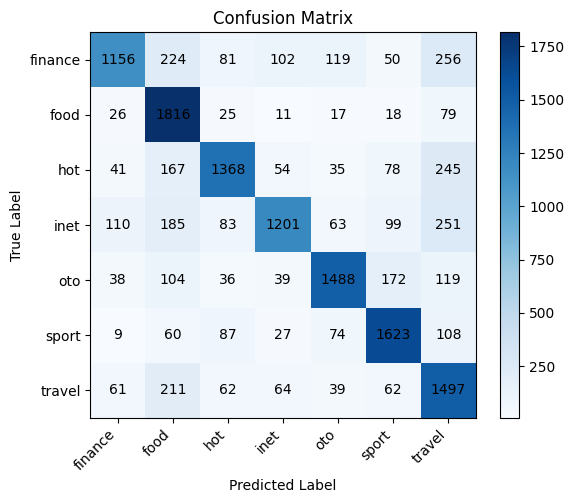

In [30]:


def plot_confusion_matrix(y_true, y_pred, class_labels):
    num_classes = len(class_labels)
    cm = np.zeros((num_classes, num_classes), dtype=int)

    label_to_index = {label: idx for idx, label in enumerate(class_labels)}
    
    for true, pred in zip(y_true, y_pred):
        i = label_to_index[true]
        j = label_to_index[pred]
        cm[i, j] += 1

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm, cmap="Blues")

    # Tampilkan angka di tiap kotak
    for i in range(num_classes):
        for j in range(num_classes):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="black")

    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    ax.set_xticklabels(class_labels, rotation=45, ha="right")
    ax.set_yticklabels(class_labels)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title("Confusion Matrix")
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()


plot_confusion_matrix(y_test, y_pred, class_labels=np.unique(y_test))


Perbanidngan Evaluasi Model

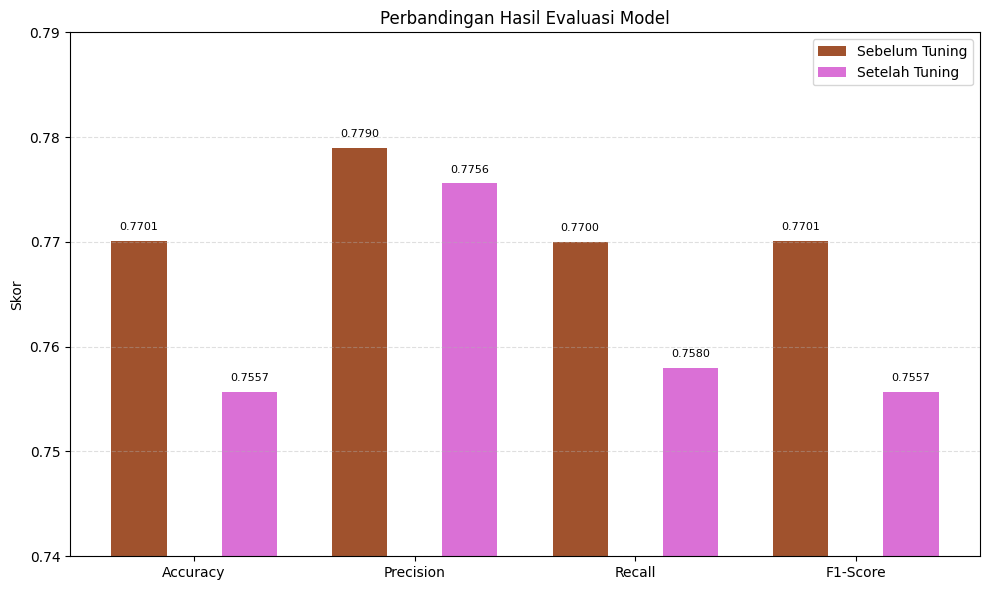

In [31]:


# Data hasil evaluasi
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
sebelum = [0.7701, 0.7790, 0.7700, 0.7701]
setelah_k10 = [0.7557, 0.7756, 0.7580, 0.7557]

x = np.arange(len(labels))
width = 0.25

# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart untuk 3 kondisi
ax.bar(x - width, sebelum, width, label='Sebelum Tuning', color='sienna')
ax.bar(x + width, setelah_k10, width, label='Setelah Tuning ', color='orchid')

# Tambahkan label dan styling
ax.set_ylabel('Skor')
ax.set_title('Perbandingan Hasil Evaluasi Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.74, 0.79)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.4)

# Tampilkan nilai di atas setiap bar
for i in range(len(labels)):
    ax.text(x[i] - width, sebelum[i] + 0.001, f"{sebelum[i]:.4f}", ha='center', fontsize=8)
    ax.text(x[i] + width, setelah_k10[i] + 0.001, f"{setelah_k10[i]:.4f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


9. Deploment Save model -> streamlit

In [32]:


# Simpan model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Simpan vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model dan vectorizer berhasil disimpan!")


✅ Model dan vectorizer berhasil disimpan!


In [33]:


# Load model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Load vectorizer
with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

print("✅ Model dan vectorizer berhasil dimuat!")


✅ Model dan vectorizer berhasil dimuat!
